In [3]:
#!git clone https://github.com/InfraSchools/analiseDados.git

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline

In [5]:
df = pd.read_csv("analiseDados/base/Base_Completa.csv", sep=';', encoding='utf-8', squeeze = True)

C:\Users\Kimbelly\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (157) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df

,ID_PROVA_BRASIL,ID_UF,ID_MUNICIPIO,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_INICIAL,PC_FORMACAO_DOCENTE_FINAL,PC_FORMACAO_DOCENTE_MEDIO,NIVEL_SOCIO_ECONOMICO,...,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF,cod,regiao,NM_UF,Capital,NM_UF_SIGLA,MEDIA_TOTAL_5EF
0,2017,11,1100015,11024666,3,2,83.3,55.6,0.0,Grupo 2,...,0.0,0.0,0.0,0.0,1.0,Norte,RondÃ´nia,Porto Velho,RO,224.05
1,2017,11,1100015,11024682,2,1,94.2,64.1,0.0,Grupo 3,...,0.0,0.0,0.0,0.0,1.0,Norte,RondÃ´nia,Porto Velho,RO,256.25
2,2017,11,1100015,11024828,3,1,100.0,55.6,0.0,Grupo 3,...,0.0,0.0,0.0,0.0,1.0,Norte,RondÃ´nia,Porto Velho,RO,202.24
3,2017,11,1100015,11024968,2,1,0.0,48.9,77.1,Grupo 3,...,0.0,0.0,0.0,0.0,1.0,Norte,RondÃ´nia,Porto Velho,RO,0.00
4,2017,11,1100015,11025077,3,1,100.0,55.6,0.0,0,...,0.0,0.0,0.0,0.0,1.0,Norte,RondÃ´nia,Porto Velho,RO,201.00
5,2017,11,1100015,11025310,3,1,78.6,63.9,0.0,0,...,0.0,0.0,0.0,0.0,1.0,Norte,RondÃ´nia,Porto Velho,RO,206.46
6,2017,11,1100015,11025352,3,2,100.0,55.6,0.0,0,...,0.0,0.0,0.0,0.0,1.0,Norte,RondÃ´nia,Porto Velho,RO,191.87
7,2017,11,1100015,11025620,2,1,85.0,45.0,0.0,Grupo 3,...,0.0,0.0,0.0,0.0,1.0,Norte,RondÃ´nia,Porto Velho,RO,222.38
8,2017,11,1100015,11025638,2,1,0.0,51.9,53.7,Grupo 3,...,0.0,0.0,0.0,0.0,1.0,Norte,RondÃ´nia,Porto Velho,RO,0.00
9,2017,11,1100015,61223483,3,1,87.5,27.3,0.0,0,...,0.0,0.0,0.0,0.0,1.0,Norte,RondÃ´nia,Porto Velho,RO,0.00


In [7]:
# [x for x in df.columns]

In [8]:
df = df[df.TAXA_PARTICIPACAO_5EF!=0]



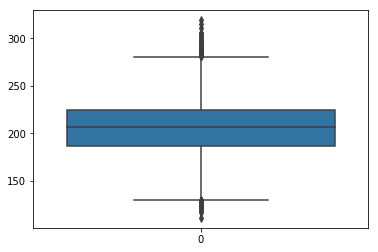

In [9]:

sns.boxplot(data=df['MEDIA_5EF_LP'])

In [10]:
""" treinamento """

q1 = df['MEDIA_5EF_LP'].quantile(q=0.25)
q4 = df['MEDIA_5EF_LP'].quantile(q=0.75)

df1Q = df[df['MEDIA_5EF_LP']<q1]
df4Q = df[df['MEDIA_5EF_LP']>q4]

df1Q['ROTULO'] = 0
df4Q['ROTULO'] = 1

treino_base_LP = pd.concat([df4Q , df1Q])

C:\Users\Kimbelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Kimbelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [11]:
print(q1)
print(q4)

186.28
224.07


In [12]:
atributos = [ 'IN_LABORATORIO_INFORMATICA','IN_BIBLIOTECA', 'IN_AGUA_FILTRADA', 'IN_ENERGIA_REDE_PUBLICA','IN_AGUA_INEXISTENTE','IN_ESGOTO_INEXISTENTE','IN_QUADRA_ESPORTES', 'IN_SALA_LEITURA','IN_BIBLIOTECA_SALA_LEITURA', 'IN_INTERNET']

X = treino_base_LP[atributos]

y = treino_base_LP['ROTULO']

In [13]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 

In [14]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

C:\Users\Kimbelly\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))